In [1]:
### data and matrix handling
import pandas as pd
import numpy as np

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

## scientific
import scipy

## utilities
import os

In [2]:
## loading the data
data_path = "x__data/"
math_path = os.path.join(data_path, "student_math_clean.csv")
portuguese_path = os.path.join(data_path, "student_portuguese_clean.csv")

math_df = pd.read_csv(math_path)
portuguese_df = pd.read_csv(portuguese_path)

## Looking at Data

### `Math` data

In [3]:
math_df.head()

student_id school sex  age address_type              family_size  \
0           1     GP   F   18        Urban           Greater than 3   
1           2     GP   F   17        Urban           Greater than 3   
2           3     GP   F   15        Urban  Less than or equal to 3   
3           4     GP   F   15        Urban           Greater than 3   
4           5     GP   F   16        Urban           Greater than 3   

     parent_status               mother_education  \
0            Apart               higher education   
1  Living together  primary education (4th grade)   
2  Living together  primary education (4th grade)   
3  Living together               higher education   
4  Living together            secondary education   

                father_education mother_job  ... family_relationship  \
0               higher education    at_home  ...                   4   
1  primary education (4th grade)    at_home  ...                   5   
2  primary education (4th grade)    at_home  ...                   4   
3               5th to 9th grade     health  ...                   3   
4            secondary education      other  ...                   4   

  free_time social weekday_alcohol weekend_alcohol  health absences grade_1  \
0         3      4               1               1       3        6       5   
1         3      3               1               1       3        4       5   
2         3      2               2               3       3       10       7   
3         2      2               1               1       5        2      15   
4         3      2               1               2       5        4       6   

  grade_2 final_grade  
0       6           6  
1       5           6  
2       8          10  
3      14          15  
4      10          10  

[5 rows x 34 columns]

In [4]:
print(f"There are {math_df.shape[0]} samples in the Math dataframe")

There are 395 samples in the Math dataframe


### `Portuguese` data

In [5]:
portuguese_df.head()

student_id school sex  age address_type              family_size  \
0           1     GP   F   18        Urban           Greater than 3   
1           2     GP   F   17        Urban           Greater than 3   
2           3     GP   F   15        Urban  Less than or equal to 3   
3           4     GP   F   15        Urban           Greater than 3   
4           5     GP   F   16        Urban           Greater than 3   

     parent_status               mother_education  \
0            Apart               higher education   
1  Living together  primary education (4th grade)   
2  Living together  primary education (4th grade)   
3  Living together               higher education   
4  Living together            secondary education   

                father_education mother_job  ... family_relationship  \
0               higher education    at_home  ...                   4   
1  primary education (4th grade)    at_home  ...                   5   
2  primary education (4th grade)    at_home  ...                   4   
3               5th to 9th grade     health  ...                   3   
4            secondary education      other  ...                   4   

  free_time social weekday_alcohol weekend_alcohol  health absences grade_1  \
0         3      4               1               1       3        4       0   
1         3      3               1               1       3        2       9   
2         3      2               2               3       3        6      12   
3         2      2               1               1       5        0      14   
4         3      2               1               2       5        0      11   

  grade_2 final_grade  
0      11          11  
1      11          11  
2      13          12  
3      14          14  
4      13          13  

[5 rows x 34 columns]

In [6]:
print(f"There are {portuguese_df.shape[0]} samples in the Portuguese dataframe")

There are 649 samples in the Portuguese dataframe


### Checking for differences in `math` and `portuguese` features

In [7]:
math_features = set(math_df.columns)
portuguese_features = set(portuguese_df.columns)

print(f"There are {len(math_features-portuguese_features)} number of feature differences")

There are 0 number of feature differences


# Exploratory Data Analysis

### Adding feature to differenciate `math intensive` subjects from `non-math-intensive`

In [8]:
new_feature_name = "math_intensive"
portuguese_df["math_intensive"] = "no"
math_df["math_intensive"] = "yes"

## Putting datasets together

In [9]:
student_df = pd.concat([portuguese_df, math_df], axis=0)

In [10]:
student_df.shape

(1044, 35)

## Checking datatypes out

In [11]:
student_df.dtypes

student_id                int64
school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_education         object
father_education         object
mother_job               object
father_job               object
school_choice_reason     object
guardian                 object
travel_time              object
study_time               object
class_failures            int64
school_support           object
family_support           object
extra_paid_classes       object
activities               object
nursery_school           object
higher_ed                object
internet_access          object
romantic_relationship    object
family_relationship       int64
free_time                 int64
social                    int64
weekday_alcohol           int64
weekend_alcohol           int64
health                    int64
absences                  int64
grade_1 

### Removing Unnecessary Features
The school feature is unnecessary since it is not a feature under consideration

In [12]:
student_df.drop(["school", "weekend_alcohol", "weekday_alcohol", "student_id"], axis=1, inplace=True)

## Checking for Missing

In [13]:
print(f"There are {student_df.isna().sum().sum()} missing values")

There are 0 missing values


## Dropping duplicate rows

In [14]:
student_df.drop_duplicates(inplace=True)

In [15]:
print(f"Number of rows after drop: {student_df.shape[0]}")

Number of rows after drop: 1044


## Data formatting for database

### function for formatting data

In [16]:
def format_data(df):
    df = df.copy()
    df["final_grade"] = df["final_grade"]/20 * 100
    df["grade_1"] = df["grade_1"]/20 * 100
    df["grade_2"] = df["grade_2"]/20 * 100

    maps = {
        "sex": {"M": "male", "F": "female"},
        "address_type": lambda x : x.lower(),
        "parent_status": {"Living together": "together", "Apart": "apart"},
        "mother_education": {"primary education (4th grade)": "primary",
                             "5th to 9th grade": "middle",
                             "secondary education": "secondary",
                             "higher education" :"higher",
                             "none" : "none"
                            },
        "father_education": {"primary education (4th grade)": "primary",
                             "5th to 9th grade": "middle",
                             "secondary education": "secondary",
                             "higher education" :"higher",
                             "none" : "none"
                            },
        "mother_job": {"teacher": "education",
                        "services": "civil",
                        "at_home": "unemployed",
                       "health": "health",
                       "other": "other"
                      },
        "father_job": {"teacher": "education",
                        "services": "civil",
                        "at_home": "unemployed",
                       "health": "health",
                       "other": "other"
                      },
        "travel_time": {"<15 min.": "less_than_15",
                       "15 to 30 min.": "within_15_and_30",
                       "30 min. to 1 hour": "within_30_and_hour",
                       ">1 hour": "greater_than_hour"},
        "study_time": {"<2 hours": "less_than_2_hours",
                       "2 to 5 hours": "within_2_and_5_hours",
                       "5 to 10 hours": "within_5_and_10_hours",
                       ">10 hours": "greater_than_10_hours"},
        "family_size": lambda x : "_".join(x.strip().lower().split())
    }

    for k, v in maps.items():
        df[k] = df[k].map(v)

    booleans = ["romantic_relationship", "internet_access", "higher_ed", "activities",
                "extra_paid_classes", "family_support", "school_support", "math_intensive",
                "nursery_school"
               ]

    for col in booleans:
        df[col] = df[col].map({"yes": 1, "no":0})

    column_renames = {"sex": "gender"}
    df = df.rename(columns=column_renames)
    
    return df


In [17]:
student_df = format_data(student_df)

## Separating into `categorical` and `numerical` features

In [18]:
cat_df = student_df.select_dtypes("object")
num_df = student_df.select_dtypes("number")

In [19]:
print(f"There are {cat_df.shape[1]} categorical features and {num_df.shape[1]} numerical features")

There are 12 categorical features and 19 numerical features


## Numerical Features

In [20]:
num_df.columns

Index(['age', 'class_failures', 'school_support', 'family_support',
       'extra_paid_classes', 'activities', 'nursery_school', 'higher_ed',
       'internet_access', 'romantic_relationship', 'family_relationship',
       'free_time', 'social', 'health', 'absences', 'grade_1', 'grade_2',
       'final_grade', 'math_intensive'],
      dtype='object')

### Dropping unnecessary columns

In [21]:
# num_df = num_df.drop(["student_id"], axis=1)

In [22]:
num_df.columns

Index(['age', 'class_failures', 'school_support', 'family_support',
       'extra_paid_classes', 'activities', 'nursery_school', 'higher_ed',
       'internet_access', 'romantic_relationship', 'family_relationship',
       'free_time', 'social', 'health', 'absences', 'grade_1', 'grade_2',
       'final_grade', 'math_intensive'],
      dtype='object')

### Numerical Data summary

In [23]:
num_df.describe()

age  class_failures  school_support  family_support  \
count  1044.000000     1044.000000     1044.000000     1044.000000   
mean     16.726054        0.264368        0.113985        0.613027   
std       1.239975        0.656142        0.317945        0.487291   
min      15.000000        0.000000        0.000000        0.000000   
25%      16.000000        0.000000        0.000000        0.000000   
50%      17.000000        0.000000        0.000000        1.000000   
75%      18.000000        0.000000        0.000000        1.000000   
max      22.000000        3.000000        1.000000        1.000000   

       extra_paid_classes   activities  nursery_school    higher_ed  \
count         1044.000000  1044.000000     1044.000000  1044.000000   
mean             0.210728     0.494253        0.799808     0.914751   
std              0.408021     0.500207        0.400335     0.279386   
min              0.000000     0.000000        0.000000     0.000000   
25%              0.000000     0.000000        1.000000     1.000000   
50%              0.000000     0.000000        1.000000     1.000000   
75%              0.000000     1.000000        1.000000     1.000000   
max              1.000000     1.000000        1.000000     1.000000   

       internet_access  romantic_relationship  family_relationship  \
count      1044.000000            1044.000000          1044.000000   
mean          0.792146               0.355364             3.935824   
std           0.405967               0.478853             0.933401   
min           0.000000               0.000000             1.000000   
25%           1.000000               0.000000             4.000000   
50%           1.000000               0.000000             4.000000   
75%           1.000000               1.000000             5.000000   
max           1.000000               1.000000             5.000000   

         free_time       social       health     absences      grade_1  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      3.201149     3.156130     3.543103     4.434866    56.068008   
std       1.031507     1.152575     1.424703     6.210017    14.916970   
min       1.000000     1.000000     1.000000     0.000000     0.000000   
25%       3.000000     2.000000     3.000000     0.000000    45.000000   
50%       3.000000     3.000000     4.000000     2.000000    55.000000   
75%       4.000000     4.000000     5.000000     6.000000    65.000000   
max       5.000000     5.000000     5.000000    75.000000    95.000000   

           grade_2  final_grade  math_intensive  
count  1044.000000  1044.000000     1044.000000  
mean     56.230843    56.709770        0.378352  
std      16.425355    19.323979        0.485209  
min       0.000000     0.000000        0.000000  
25%      45.000000    50.000000        0.000000  
50%      55.000000    55.000000        0.000000  
75%      65.000000    70.000000        1.000000  
max      95.000000   100.000000        1.000000

### Feature Distributions

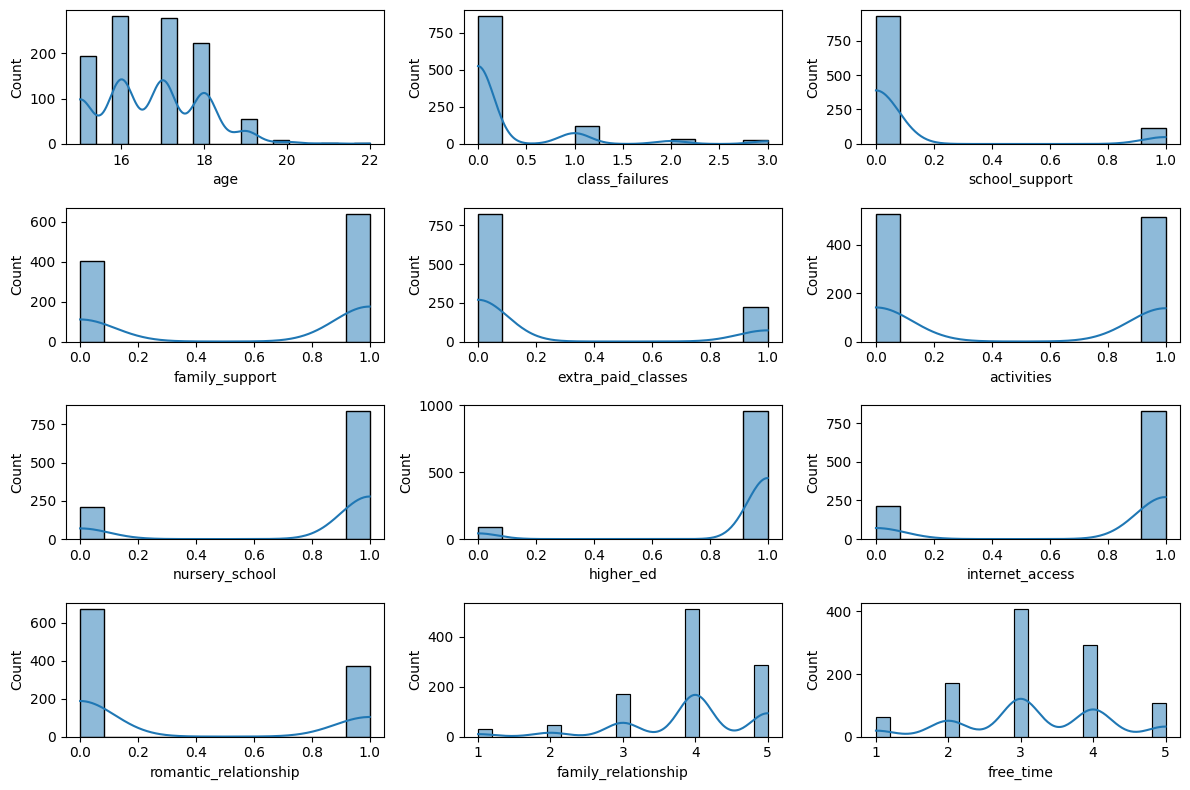

In [24]:
# student_df["age"].hist()
# sns.displot(student_df,  kind="kde")
fig, axes = plt.subplots(4,3, figsize=(12, 8))

for ax,col in zip(axes.flatten(), num_df.columns):
    sns.histplot(num_df[col], ax=ax, kde=True)

plt.tight_layout()
plt.show()

### Checking Correlations

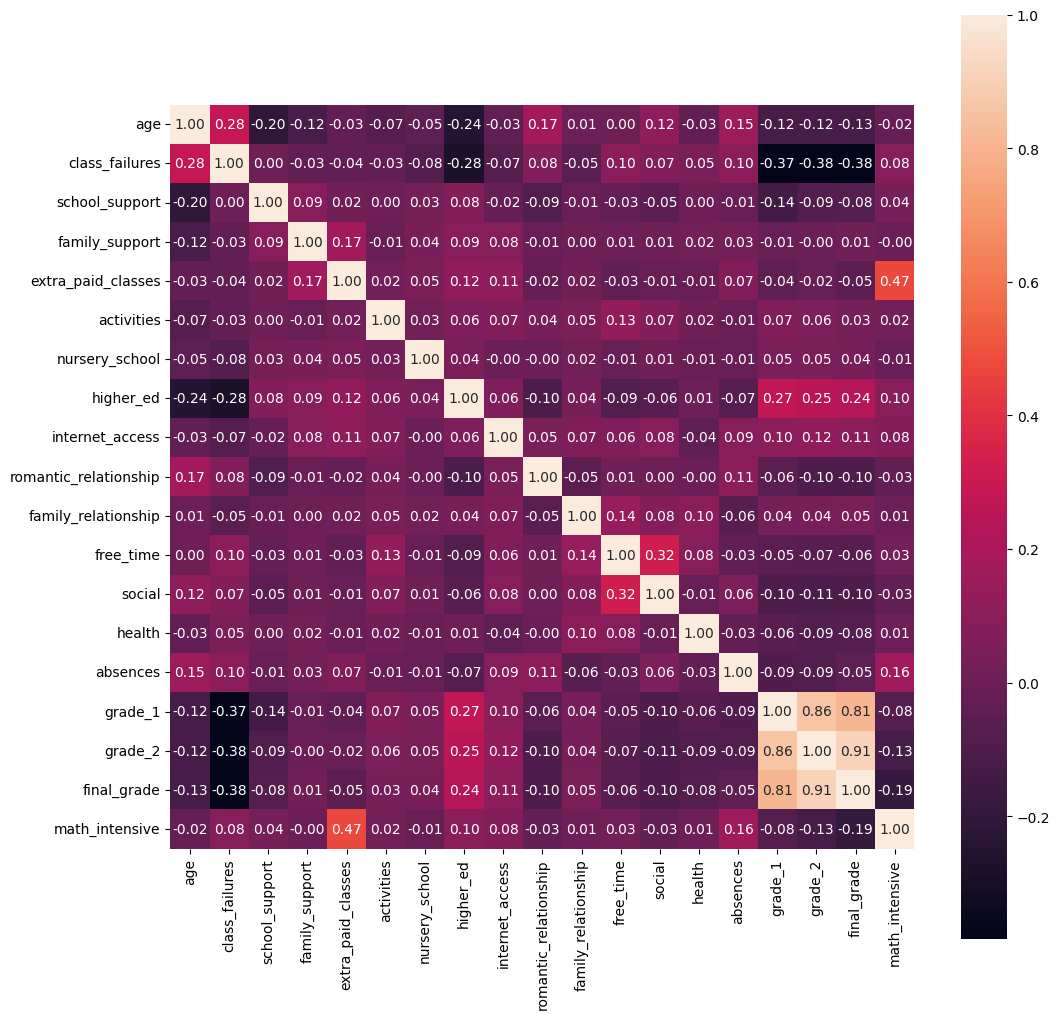

In [25]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(num_df.corr(), square=True, annot=True, fmt=".2f")
plt.show()

### Pairplots
This is necessary to see the relationship between variables; whether `linear`, `quadratic` etc

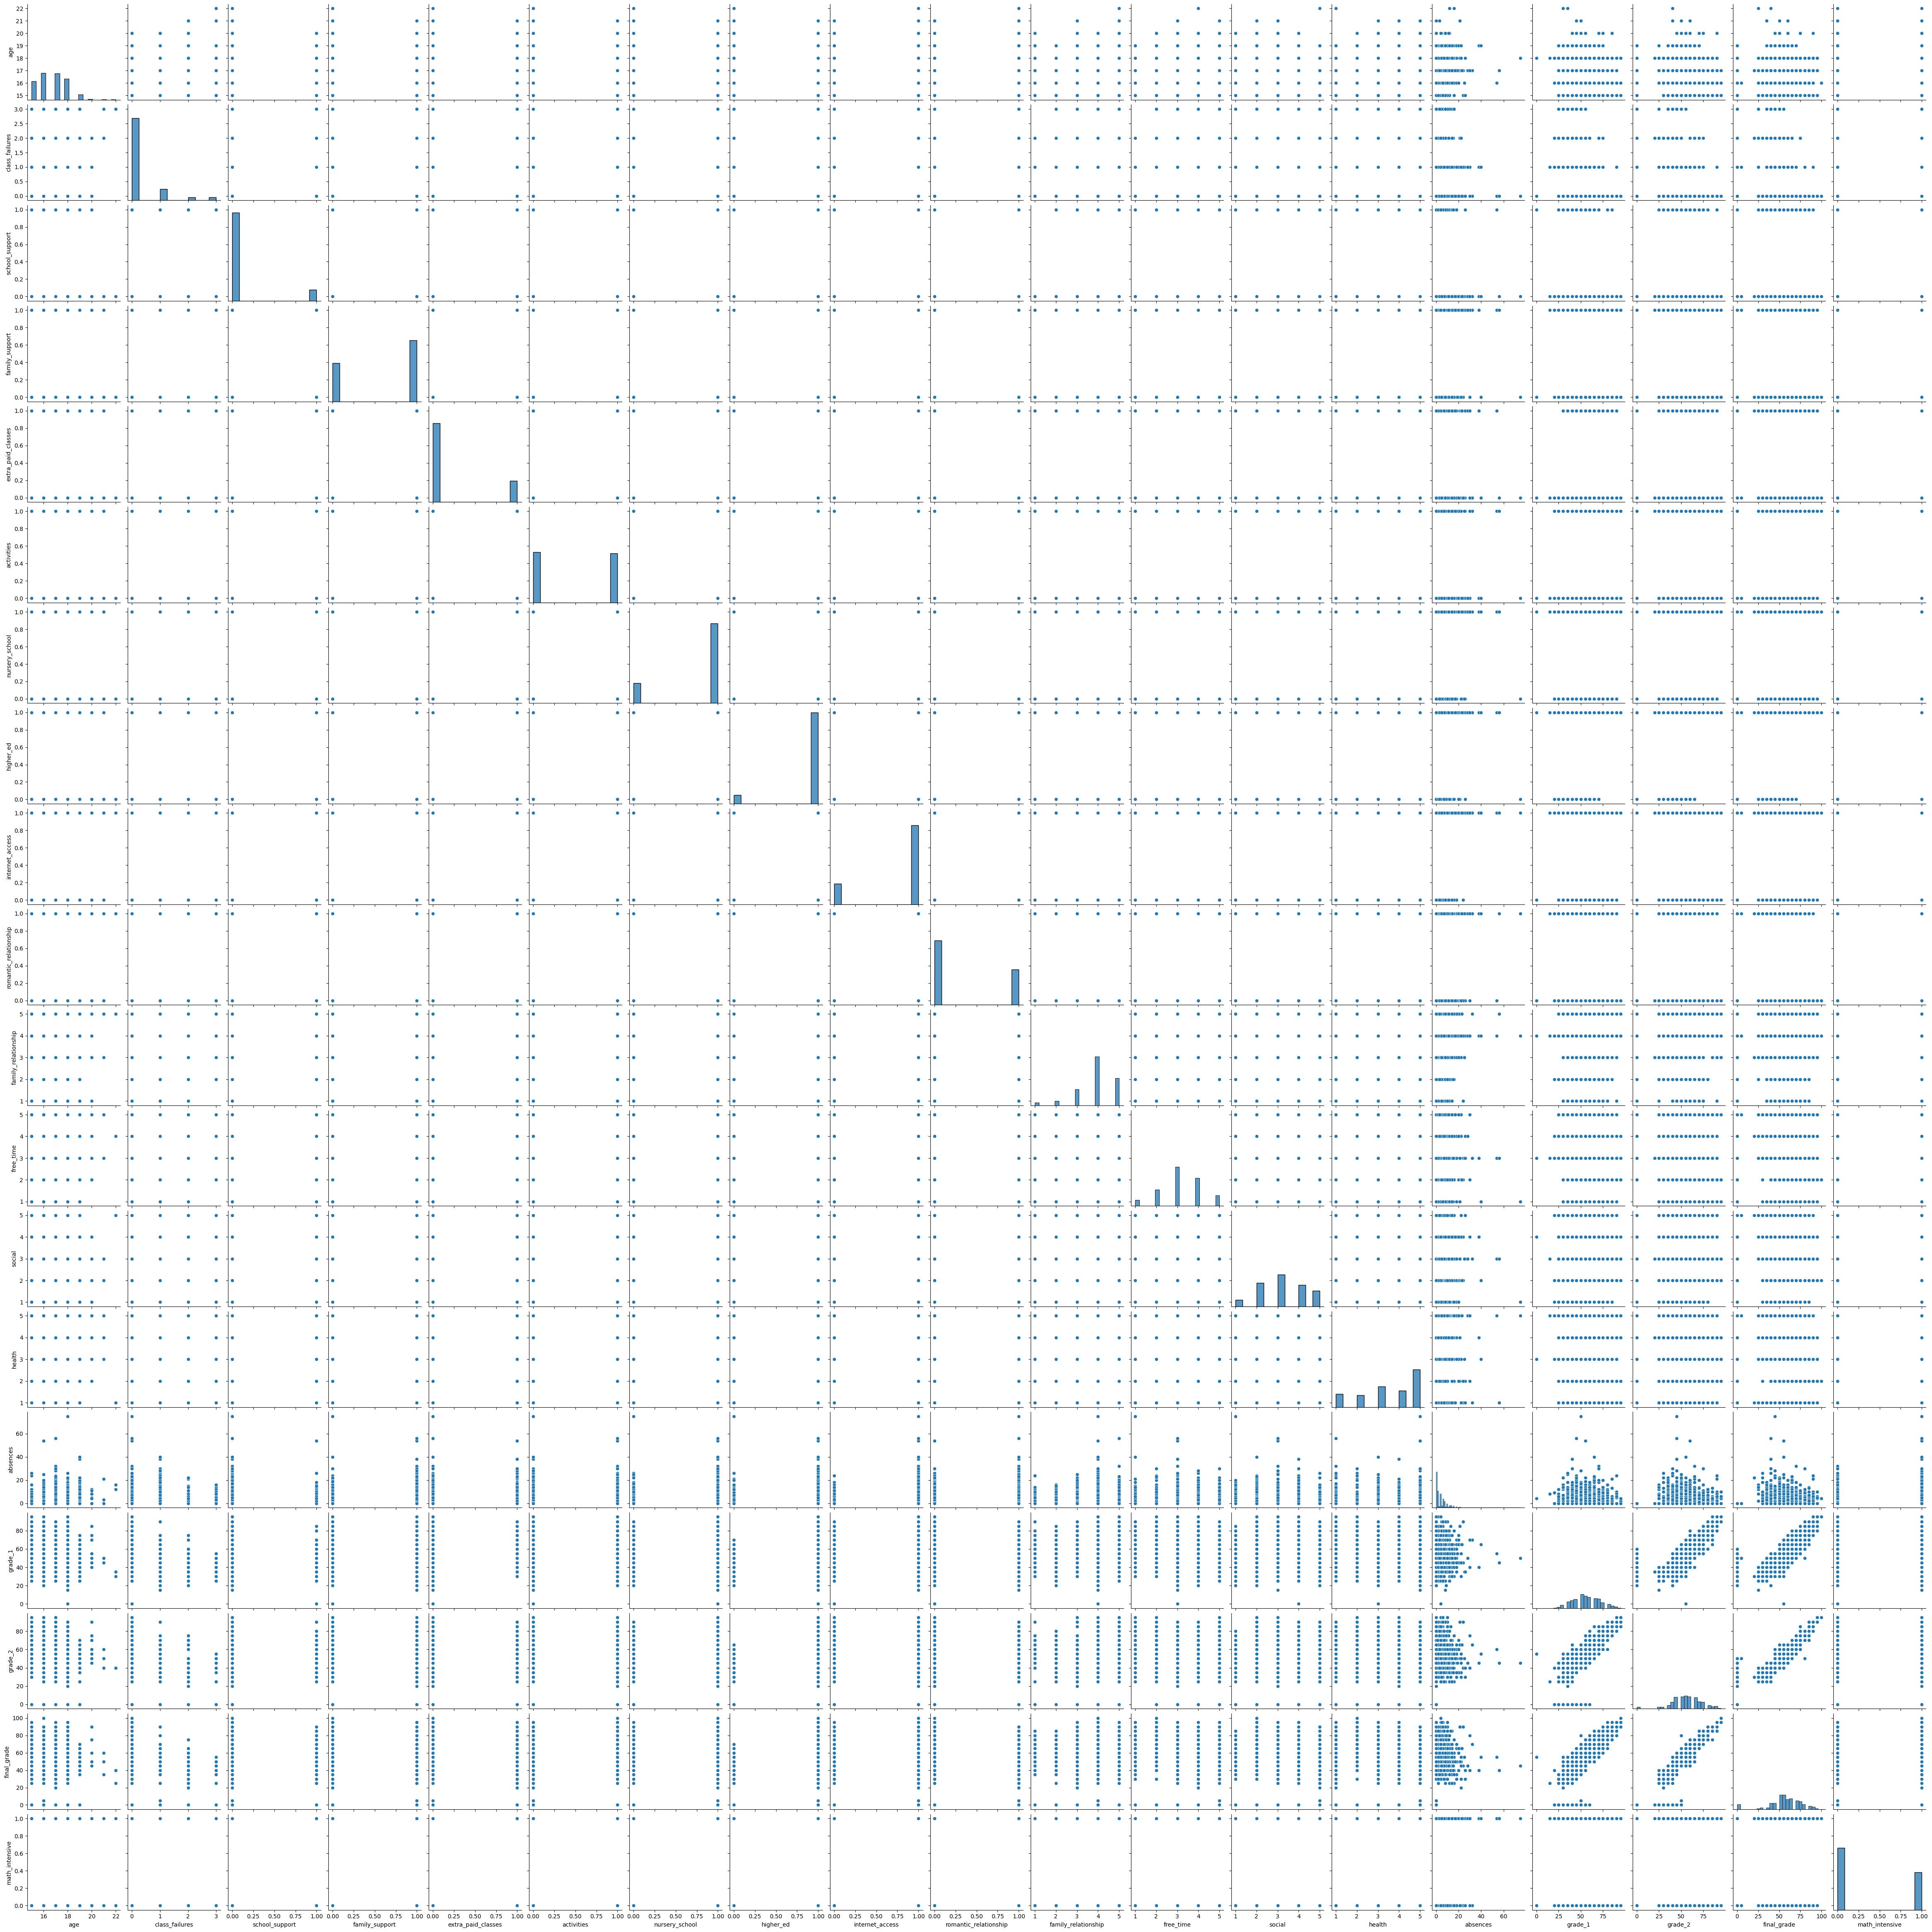

In [26]:
sns.pairplot(num_df)
plt.show()

### Univariate Analysis

#### Final Grade (`target`)

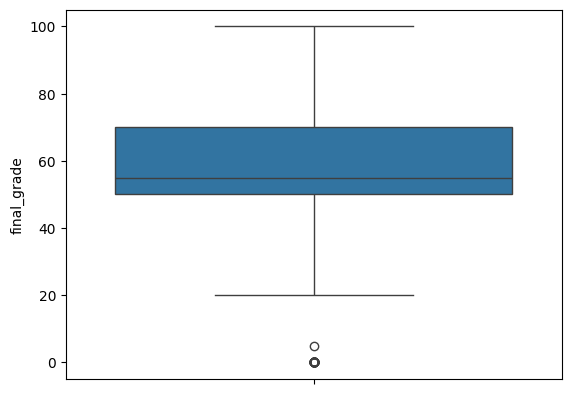

In [27]:
sns.boxplot(num_df["final_grade"])
plt.show()

In [28]:
num_df[num_df["final_grade"] <= 0].describe()

age  class_failures  school_support  family_support  \
count  53.000000       53.000000       53.000000       53.000000   
mean   17.283019        0.886792        0.037736        0.509434   
std     1.246184        1.012620        0.192380        0.504695   
min    15.000000        0.000000        0.000000        0.000000   
25%    16.000000        0.000000        0.000000        0.000000   
50%    18.000000        1.000000        0.000000        1.000000   
75%    18.000000        1.000000        0.000000        1.000000   
max    19.000000        3.000000        1.000000        1.000000   

       extra_paid_classes  activities  nursery_school  higher_ed  \
count           53.000000   53.000000       53.000000  53.000000   
mean             0.169811    0.547170        0.773585   0.792453   
std              0.379060    0.502533        0.422516   0.409432   
min              0.000000    0.000000        0.000000   0.000000   
25%              0.000000    0.000000        1.000000   1.000000   
50%              0.000000    1.000000        1.000000   1.000000   
75%              0.000000    1.000000        1.000000   1.000000   
max              1.000000    1.000000        1.000000   1.000000   

       internet_access  romantic_relationship  family_relationship  free_time  \
count        53.000000              53.000000            53.000000  53.000000   
mean          0.716981               0.547170             3.849057   3.245283   
std           0.454776               0.502533             1.098885   0.958879   
min           0.000000               0.000000             1.000000   1.000000   
25%           0.000000               0.000000             3.000000   3.000000   
50%           1.000000               1.000000             4.000000   3.000000   
75%           1.000000               1.000000             5.000000   4.000000   
max           1.000000               1.000000             5.000000   5.000000   

          social     health  absences    grade_1    grade_2  final_grade  \
count  53.000000  53.000000      53.0  53.000000  53.000000         53.0   
mean    3.169811   3.660377       0.0  36.981132  22.075472          0.0   
std     1.410617   1.300050       0.0   9.005320  18.538784          0.0   
min     1.000000   1.000000       0.0  20.000000   0.000000          0.0   
25%     2.000000   3.000000       0.0  30.000000   0.000000          0.0   
50%     3.000000   4.000000       0.0  35.000000  25.000000          0.0   
75%     4.000000   5.000000       0.0  40.000000  40.000000          0.0   
max     5.000000   5.000000       0.0  60.000000  50.000000          0.0   

       math_intensive  
count       53.000000  
mean         0.716981  
std          0.454776  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

## Categorical Features

### Brief description

In [29]:
cat_df.describe(include="object").T

count unique                   top freq
gender                1044      2                female  591
address_type          1044      2                 urban  759
family_size           1044      2        greater_than_3  738
parent_status         1044      2              together  923
mother_education      1044      5                higher  306
father_education      1044      5                middle  324
mother_job            1044      5                 other  399
father_job            1044      5                 other  584
school_choice_reason  1044      4                course  430
guardian              1044      3                mother  728
travel_time           1044      4          less_than_15  623
study_time            1044      4  within_2_and_5_hours  503

### Categories and mean scores

#### Getting the standard deviation of ***final_grade***

In [30]:
student_df["final_grade"].describe()

count    1044.000000
mean       56.709770
std        19.323979
min         0.000000
25%        50.000000
50%        55.000000
75%        70.000000
max       100.000000
Name: final_grade, dtype: float64

In [31]:
def mean_on_group(feature):
    return student_df.groupby(feature)["final_grade"].mean()

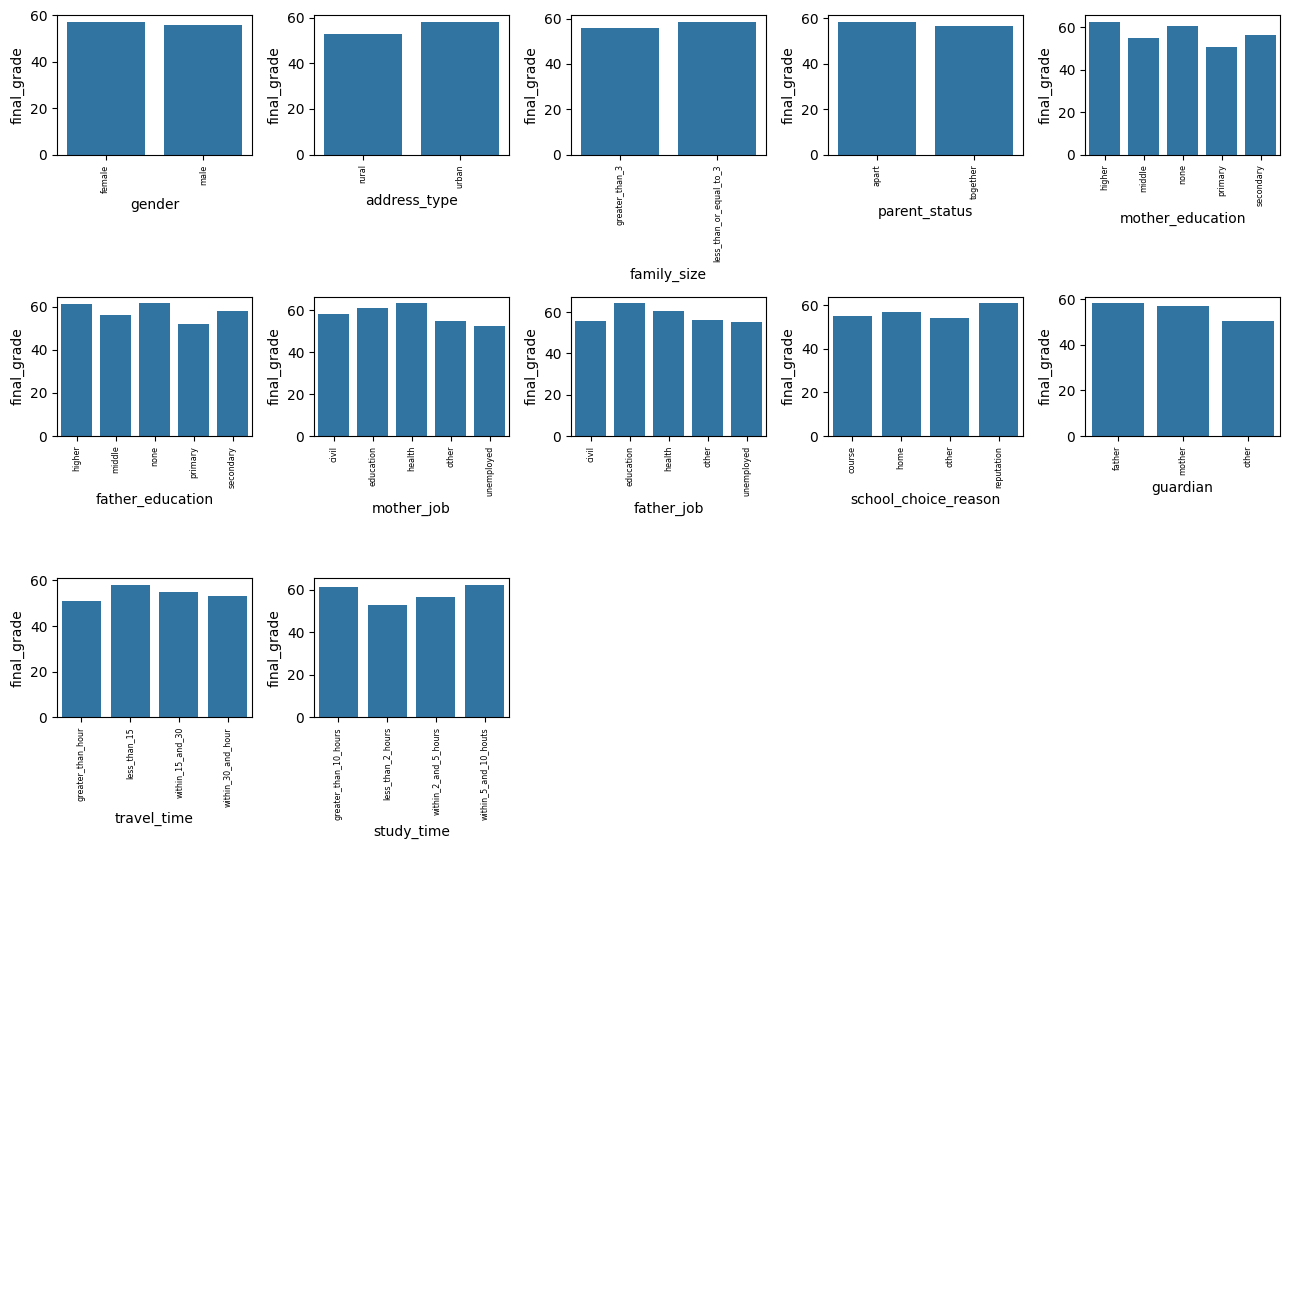

In [32]:
n = len(cat_df.columns)
fig, axes = plt.subplots(5,5, figsize=(13,13))
axes = axes.flatten()
for col, ax in zip(cat_df.columns, axes):
    sns.barplot(mean_on_group(col), ax=ax)


for i in range(len(axes)):
    ax = axes[i]
    if i >= len(cat_df.columns):
        ax.set_axis_off()
    else:
        ax.set_xticks(ax.get_xticks(), labels=ax.get_xticklabels(), rotation=90, fontsize="xx-small")

plt.tight_layout()
plt.show()

- <span style="color: slateblue">Students who want plan on taking <strong>higher_ed</strong> perform significantly better than those who don't plan to (difference in mean final grade is greater than 1 standard deviation)</span>
- <span style="color: slateblue">This could be due to the fact that majority wish to pursue higher education, hence inbalance<span/>

#### Bivariate analysis with `higher_ed` as hue

<Axes: xlabel='grade_1', ylabel='final_grade'>

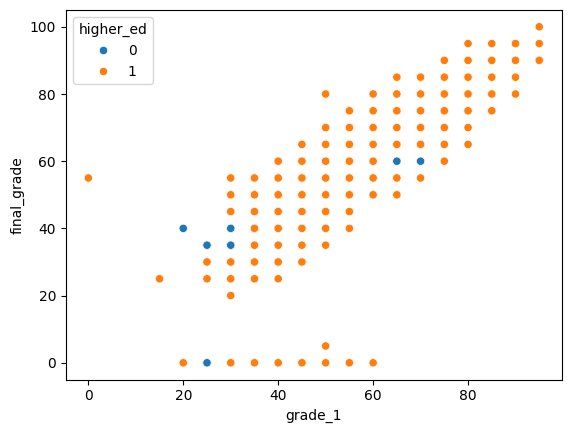

In [33]:
sns.scatterplot(data=student_df, x="grade_1", y="final_grade", hue="higher_ed")

<span style="color: slateblue">Reason for lower mean of student who do not wish to pursue higher ed might be due to single outlier</span>

In [34]:
cat_df[num_df["final_grade"] <= 0].describe(include="object").T.sort_values(by="freq", ascending=False)

count unique                   top freq
parent_status           53      2              together   49
family_size             53      2        greater_than_3   44
guardian                53      3                mother   36
address_type            53      2                 urban   33
gender                  53      2                female   30
father_job              53      4                 other   29
travel_time             53      4          less_than_15   26
school_choice_reason    53      4                course   24
study_time              53      4  within_2_and_5_hours   23
mother_job              53      5                 other   22
father_education        53      4                middle   20
mother_education        53      4                middle   19

## Preparing for prediction

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Separating into predictors and target

In [36]:
drops = ["final_grade", "grade_1"]
X = student_df.drop(drops, axis=1)
y = student_df["final_grade"]

### Splitting data into train and test

In [37]:
ts = 0.2
rs = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

NameError: name 'train_test_split' is not defined

### `Preprocessing Pipeline`

In [ ]:
## getting numerical and categorical features
numerical_features = num_df.drop(drops, axis=1).columns
categorical_features = cat_df.columns

## transformer for numeric features
numeric_transformer = Pipeline(steps = [("scaler", StandardScaler())])

## transformer for categorical features
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder())])


## preprocessor)
preprocessor = ColumnTransformer(
    transformers = [
        ("numerical", numeric_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features)
    ]
)

### Preprocessing

In [ ]:
preprocessor.fit(X_train)

In [ ]:
X_train = preprocessor.transform(X_train)

## Training

In [224]:
## models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

## hyperparameter selection
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

## metrics
from sklearn.metrics import r2_score

### Grid Search

In [225]:
## folds
kf = KFold(n_splits=7, shuffle=True, random_state=42)

In [226]:
## function for grid_search
def grid_search(estimator, params, X, y, verbose=0):
    global kf
    grid = GridSearchCV(estimator, params, cv=kf, scoring="r2", verbose=verbose)
    grid.fit(X, y)

    print(f"Best score: {grid.best_score_}")
    print(f"Best parameters: {grid.best_params_}")

    return grid.best_score_, grid.best_params_, grid.best_estimator_

#### Decision Tree Regressor

In [227]:
params = {
    "max_depth": [2,4,6,8]
}

grid_search(DecisionTreeRegressor(), params, X_train, y_train)

Best score: 0.8326576397434505
Best parameters: {'max_depth': 4}


(0.8326576397434505, {'max_depth': 4}, DecisionTreeRegressor(max_depth=4))

#### SVR

In [49]:
params = {
    "C": [0.5, 1, 1.3]
}

grid_search(SVR(), params, X_train, y_train)

Best score: 0.7515412397893215
Best parameters: {'C': 1.3}


AttributeError: 'GridSearchCV' object has no attribute 'best_score'

#### Random Forest Regressor

In [52]:
params = {
    "n_estimators": [100, 300, 500],
    "max_depth": [4,6,8, 10]
}

_, _, estimator = grid_search(RandomForestRegressor(), params, X_train, y_train, verbose=10)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
[CV 1/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 1/7; 1/12] END max_depth=4, n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 2/7; 1/12] END max_depth=4, n_estimators=100;, score=0.838 total time=   0.3s
[CV 3/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 3/7; 1/12] END max_depth=4, n_estimators=100;, score=0.916 total time=   0.3s
[CV 4/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 4/7; 1/12] END max_depth=4, n_estimators=100;, score=0.816 total time=   0.3s
[CV 5/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 5/7; 1/12] END max_depth=4, n_estimators=100;, score=0.849 total time=   0.5s
[CV 6/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 6/7; 1/12] END max_depth=4, n_estimator

#### Gradient Boosting Regressor

In [124]:
params = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.1, 0.3, 1]
}

grid_search(GradientBoostingRegressor(), params, X_train, y_train, verbose=10)

Fitting 7 folds for each of 36 candidates, totalling 252 fits
[CV 1/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 1/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.325 total time=   0.9s
[CV 2/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 2/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.422 total time=   0.8s
[CV 3/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 3/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.252 total time=   1.0s
[CV 4/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 4/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.263 total time=   1.0s
[CV 5/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 5/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.406 total time=   0.9s
[CV 6/7; 1/36] START learnin

GradientBoostingRegressor(max_depth=2, n_estimators=300)

#### LGBMRegressor

In [67]:
params = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.1, 0.3, 1]
}

bs, bp, _ = grid_search(LGBMRegressor(verbose=0), params, X_train, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [69]:
# bp

NameError: name 'bp' is not defined

### Training Models

#### Linear Regression

In [89]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [90]:
print(r2_score(lr.predict(X_test), y_test))

-1.5003242132110124


## Model interpretation

In [228]:
from sklearn.inspection import permutation_importance, partial_dependence, PartialDependenceDisplay
import lime.lime_tabular

### Fitting selected model

In [229]:
estimator = RandomForestRegressor(**{'max_depth': 4, 'n_estimators': 300})
estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=300)

### Checking performance of model on testing data

In [230]:
print(r2_score(y_test, estimator.predict(preprocessor.transform(X_test))))

0.8812393937769579


### Getting feature importances

In [231]:
feature_importances = permutation_importance(estimator=estimator, X=X_train, y=y_train, n_repeats=10, random_state=42)

In [232]:
## sorting from most important to least important
sorted_idxs = feature_importances.importances_mean.argsort()

#### Getting top features

In [233]:
top_idxs = sorted_idxs[-12:][::-1]
top_features = preprocessor.get_feature_names_out()[top_idxs]
top_scores = feature_importances.importances_mean[top_idxs]

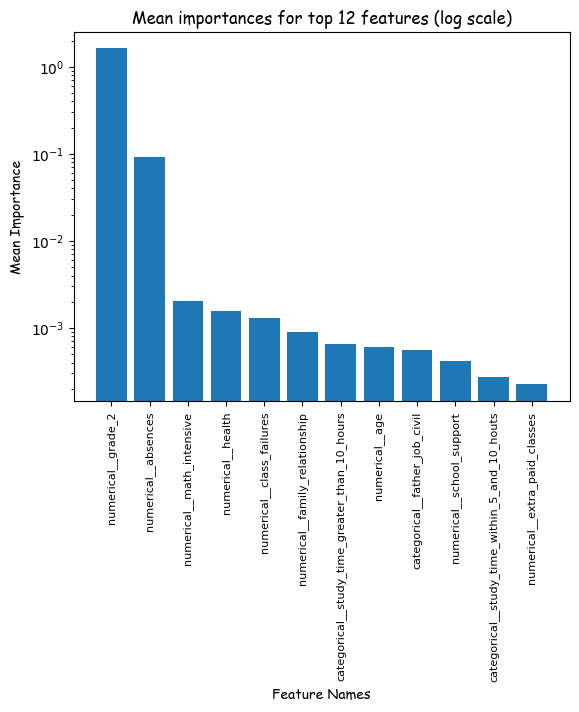

In [234]:
## displaying top 10 features
plt.bar(top_features, top_scores, log=True, animated=True)

## presets
plt.xticks(rotation=90, fontsize=8)
csfont = {'fontname':'Comic Sans MS'}
label_font = {"fontname": "cursive", "fontsize": 10}
plt.title(f"Mean importances for top {len(top_features)} features (log scale)",**csfont)


plt.xlabel('Feature Names', **label_font)
plt.ylabel("Mean Importance", **label_font)

plt.show()

#### Partial dependence for top features

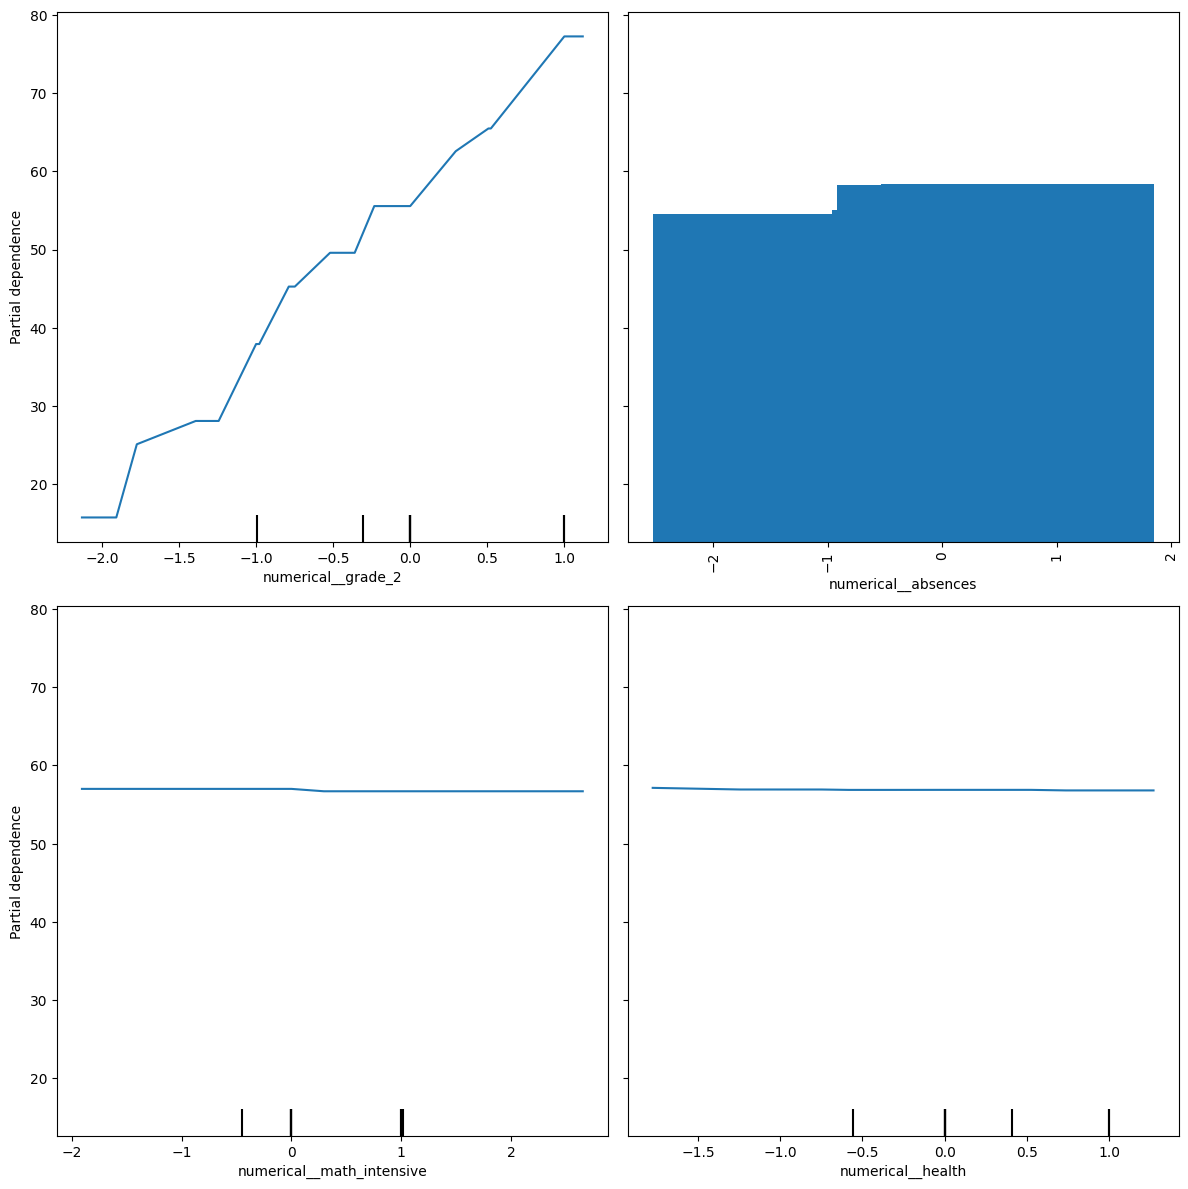

In [235]:
fig, axes = plt.subplots(2,2,figsize=(12,12))

PartialDependenceDisplay.from_estimator(
    estimator=estimator,
    X=X_train.T,
    features=top_idxs[:4],
    categorical_features=[top_idxs[1]],
    random_state=42,
    feature_names = preprocessor.get_feature_names_out(),
    n_cols=4,
    ax=axes
)

plt.tight_layout()
plt.show()

In [236]:
top_features

array(['numerical__grade_2', 'numerical__absences',
       'numerical__math_intensive', 'numerical__health',
       'numerical__class_failures', 'numerical__family_relationship',
       'categorical__study_time_greater_than_10_hours', 'numerical__age',
       'categorical__father_job_civil', 'numerical__school_support',
       'categorical__study_time_within_5_and_10_houts',
       'numerical__extra_paid_classes'], dtype=object)

### Surrogate (Linear Regression)

In [237]:
## get black box predictions
y_blackbox = estimator.predict(preprocessor.transform(X_test))

## train surrogate
surrogate = Ridge(max_iter=10000, alpha=0.5)
surrogate.fit(preprocessor.transform(X_test), y_blackbox)

Ridge(alpha=0.5, max_iter=10000)

In [238]:
## check performance
r2_score(y_blackbox, surrogate.predict(preprocessor.transform(X_test)))

0.977901459343285

In [239]:
surrogate.coef_

array([-4.70783774e-02, -3.75730987e-01, -4.12214202e-01,  1.20287243e-01,
        1.06062330e-01, -4.00882491e-02, -5.30631407e-01,  8.05878501e-02,
       -7.98818767e-02,  3.12966942e-01, -1.03603398e-01, -7.60200374e-02,
        5.04083478e-01,  2.36583454e-01,  3.28520877e-01,  1.65932335e+01,
       -2.75754475e-01,  2.53099159e-01, -2.53099159e-01, -6.96943392e-01,
        6.96943392e-01,  2.02808027e-03, -2.02808027e-03,  1.29456619e-01,
       -1.29456619e-01,  9.25776962e-01, -6.26234101e-01,  0.00000000e+00,
       -9.46907804e-01,  6.47364943e-01, -6.78896688e-02, -2.68393744e-01,
        7.50915394e-01,  7.65933717e-02, -4.91225353e-01,  2.32895549e-01,
       -9.41964856e-02, -1.06745504e+00,  1.01314571e-01,  8.27441408e-01,
       -1.02186678e+00, -7.23518739e-01,  7.09600100e-02,  7.69465426e-01,
        9.04960080e-01, -1.92907534e-01,  6.39062592e-01,  1.15694367e-01,
       -5.61849425e-01,  2.65966684e-01, -9.10053772e-02, -1.74961307e-01,
       -7.16116447e-01, -

<BarContainer object of 12 artists>

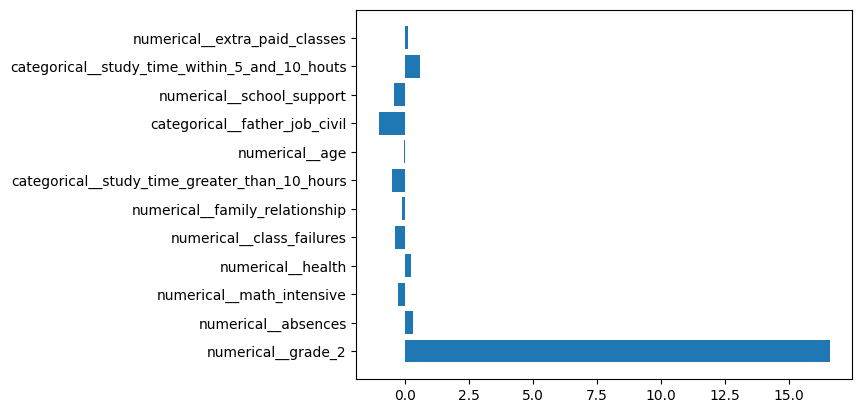

In [240]:
# fig = plt.figure(figsize=(12,12))
plt.barh(preprocessor.get_feature_names_out()[top_idxs],surrogate.coef_[top_idxs])

### **LIME** for random test sample

#### Creating explainer

In [241]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=preprocessor.transform(X_test),
    mode="regression",
    feature_names=preprocessor.get_feature_names_out(),
    random_state=42,
    verbose=True
)

In [242]:
instance_idx = np.random.randint(X_test.shape[0])
selected_instance = preprocessor.transform(X_test)[instance_idx]
pd.DataFrame(data=selected_instance.reshape(1,-1), columns=preprocessor.get_feature_names_out())[top_features]

numerical__grade_2  numerical__absences  numerical__math_intensive  \
0            0.216255             1.601634                   1.268611   

   numerical__health  numerical__class_failures  \
0           1.001413                   -0.40975   

   numerical__family_relationship  \
0                       -2.082235   

   categorical__study_time_greater_than_10_hours  numerical__age  \
0                                            0.0         0.22573   

   categorical__father_job_civil  numerical__school_support  \
0                            0.0                  -0.360424   

   categorical__study_time_within_5_and_10_houts  \
0                                            0.0   

   numerical__extra_paid_classes  
0                      -0.520508

In [243]:
estimator.predict(selected_instance.reshape(1,-1))

array([62.01845508])

Intercept 52.71494451334009
Prediction_local [66.85171711]
Right: 62.01845508227199


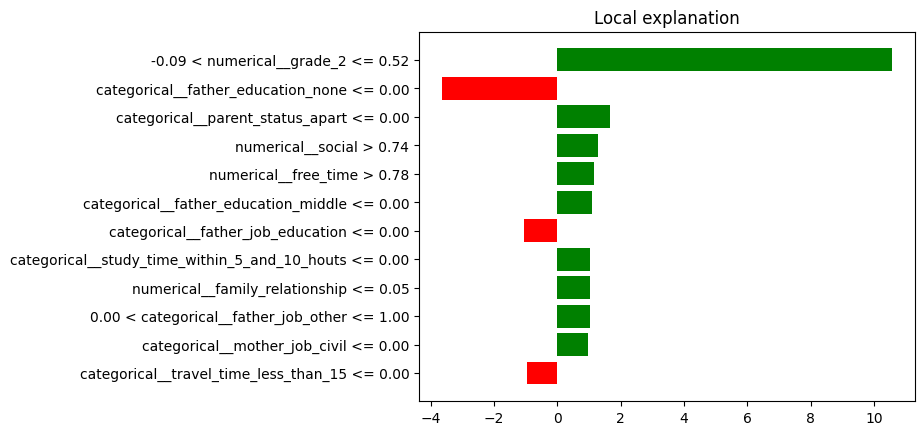

In [244]:
exp = explainer.explain_instance(selected_instance,
                                 estimator.predict,
                                 num_features=len(top_features)
                                )

exp.as_pyplot_figure()
plt.show()

## Saving Data

In [250]:
save_folder = "x__data/"
X_test.reset_index().to_json(os.path.join(save_folder, "database_data.json"), orient="records", index=False)

# USE UNSEEN DATA AS `DATA FOR APP`